In [ ]:
!pip install keras
!pip install tensorflow

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [6]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))  # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Generalizing (avoiding overfitting)
model.add(Dense(1))
model.add(Activation('sigmoid')) #softmax for multiclass, linear for regress

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/Users/ashokveda/Downloads/cats_dogs/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/Users/ashokveda/Downloads/cats_dogs/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
import time

In [9]:
%%time
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
#model.save_weights('first_try2.h5')  # always save your weights after training or during training

Epoch 1/3
125/125 [==============================] - 37s 293ms/step - loss: 0.4440 - accuracy: 0.7945 - val_loss: 0.5474 - val_accuracy: 0.8025
Epoch 2/3
125/125 [==============================] - 53s 420ms/step - loss: 0.4235 - accuracy: 0.8130 - val_loss: 0.4829 - val_accuracy: 0.7525
Epoch 3/3
125/125 [==============================] - 41s 326ms/step - loss: 0.4217 - accuracy: 0.8200 - val_loss: 0.9254 - val_accuracy: 0.7525
CPU times: user 6min 14s, sys: 2min 34s, total: 8min 49s
Wall time: 2min 10s


In [ ]:
#model.save_weights('cats_dogs_model_jan2020.h5')  # always save your weights after training or during training

In [8]:
#model.load_weights('good_model_cnn2.h5')

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img('/Users/ashokveda/Desktop/28maycat.jpeg')  # this is a PIL image
x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

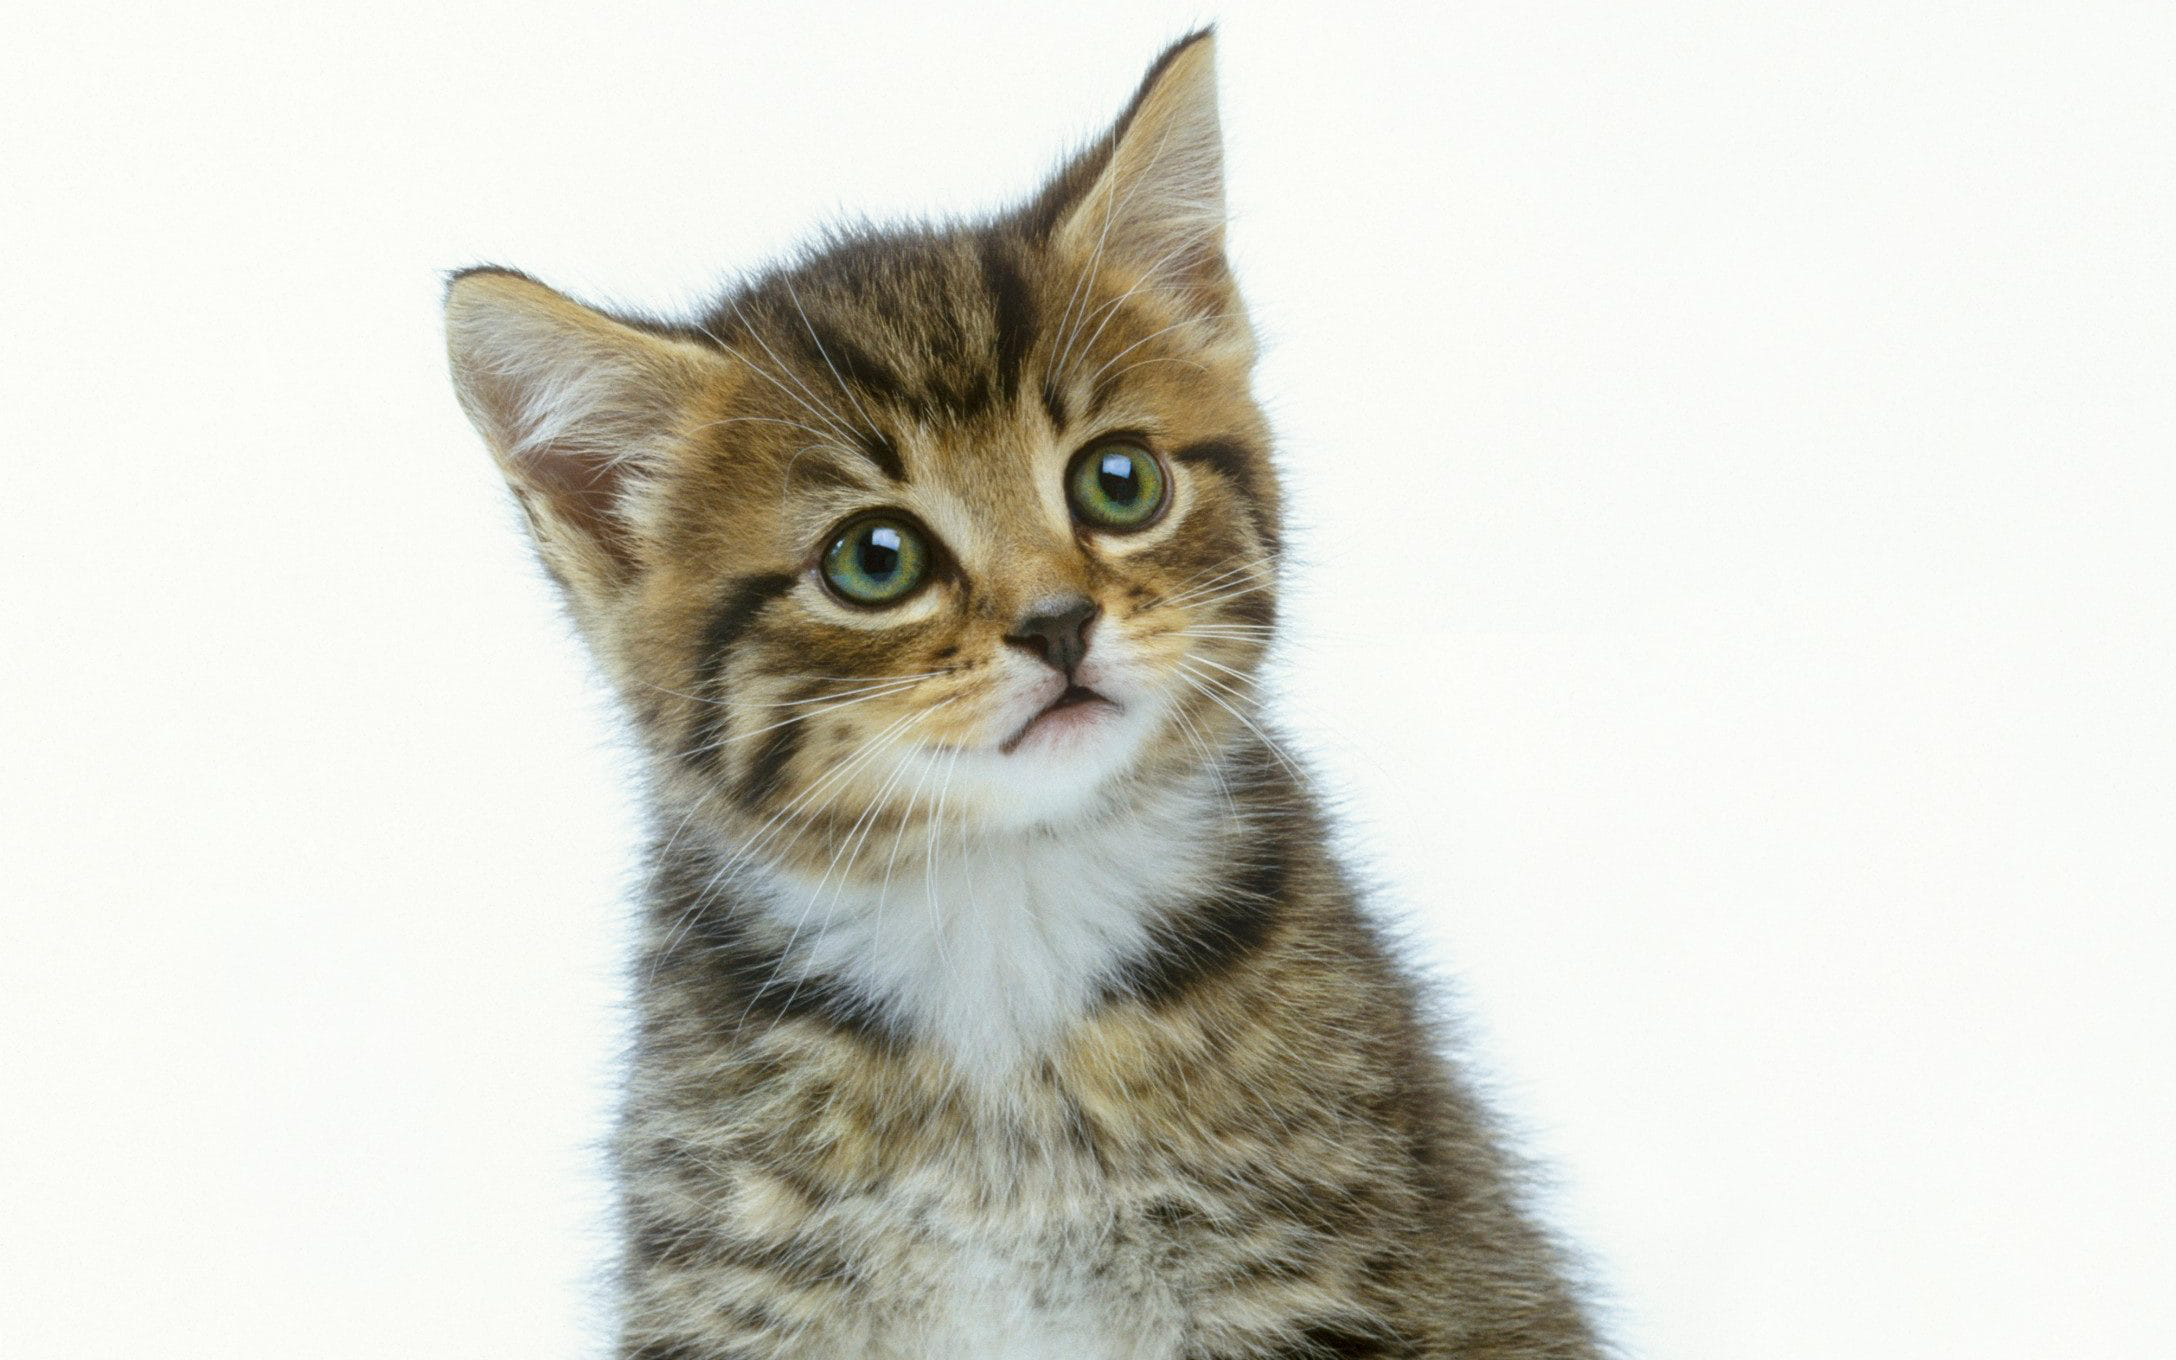

In [11]:
img

In [12]:
if (model.predict_classes(x)==0):
    print ("It is a CAT")
else:
    print ("It is a DOG")


It is a CAT
